# Rede Neural para Acidentes em uma Usina Nuclear

## Bibliotecas usadas na implementação da rede

In [27]:
import numpy as np # será usada para mexer com vetores e matrizes
import pandas as pd # será usada para mexer com o arquivo Excel
import matplotlib.pyplot as plt # será usada para mostrar os gráficos desejados
from sklearn.preprocessing import MinMaxScaler # será usada para normalizar os dados do Excel
from sklearn.preprocessing import LabelBinarizer # será usada para transformar os acidentes em binários
from sklearn.model_selection import train_test_split # será usada para dividir o conjunto de dados do arquivo Excel
from tensorflow import random 
from tensorflow.keras import layers, models, optimizers # será usada na construção da rede

seed = 1
np.random.seed(seed)
random.set_seed(seed)

## Abrindo o arquivo Excel para leitura

In [28]:
dados = pd.read_excel("/content/sample_data/dados_trabalho.xlsx")

## Selecionando os dados de entrada/saída

In [29]:
entradas = dados.iloc[:,0:17]
saidas = dados.iloc[:,-1]

## Selecionando os dados que serão usados para treinamento, teste e validação

In [30]:
entradasTreino, entradasTeste, saidasTreino, saidasTeste = train_test_split(entradas, saidas, test_size=0.2)
entradasTreino, entradasValid, saidasTreino, saidasValid = train_test_split(entradasTreino, saidasTreino, test_size=0.2)
print("Quantidade de entradas para treinamento da rede: ", len(entradasTreino))
print("Quantidade de entradas para teste da rede: ", len(entradasTeste))
print("Quantidade de entradas para validação dade rede: ", len(entradasValid))

Quantidade de entradas para treinamento da rede:  468
Quantidade de entradas para teste da rede:  147
Quantidade de entradas para validação dade rede:  117


## Normalizando os dados de entrada e transformando os nomes dos acidentes em números binários

In [31]:
normalizer = MinMaxScaler(feature_range = (0, 1))
entradasTreino = normalizer.fit_transform(entradasTreino)
entradasValid = normalizer.transform(entradasValid)
entradasTeste = normalizer.transform(entradasTeste)

lb = LabelBinarizer()
saidasTreino = lb.fit_transform(saidasTreino)
saidasValid = lb.transform(saidasValid)
saidasTeste = lb.transform(saidasTeste)

## Definindo as quantidades de entradas, saídas, neurônios, funções de ativação, tipo de otimizador, função erro, tamanho do batch e o número de épocas

In [32]:
quant_entradas = entradasTreino.shape[1]
quant_saidas = saidasTreino.shape[1]
quant_neuronios = 30
funcaoAtivacao = "sigmoid"
funcaoSaida = "softmax"
optimizer = optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1E-8, decay=0.0)
funcaoErro ='categorical_crossentropy'
batelada = 50
epocas =  400

## Estrutrando a rede

In [33]:
model = models.Sequential()
# Camada de entrada e camada escondida 1
model.add(layers.Dense(quant_neuronios, activation=funcaoAtivacao, input_dim=quant_entradas))
# Camada Escondida 2
model.add(layers.Dense(quant_neuronios, activation=funcaoAtivacao))
# Camada de Saída
model.add(layers.Dense(quant_saidas, activation=funcaoSaida))

## Compilando a rede neural

In [34]:
model.compile(loss=funcaoErro, optimizer=optimizer)

## Treinando a rede neural

In [35]:
history = model.fit(entradasTreino, saidasTreino, epochs=epocas, batch_size=batelada, validation_data=(entradasValid, saidasValid), shuffle=True,
          verbose=1)

Epoch 1/400
10/10 [==============================] - 0s 13ms/step - loss: 1.4037 - val_loss: 1.3867
Epoch 2/400
10/10 [==============================] - 0s 3ms/step - loss: 1.3562 - val_loss: 1.3042
Epoch 3/400
10/10 [==============================] - 0s 3ms/step - loss: 1.2967 - val_loss: 1.2490
Epoch 4/400
10/10 [==============================] - 0s 3ms/step - loss: 1.2294 - val_loss: 1.1653
Epoch 5/400
10/10 [==============================] - 0s 3ms/step - loss: 1.1591 - val_loss: 1.0619
Epoch 6/400
10/10 [==============================] - 0s 3ms/step - loss: 1.0528 - val_loss: 0.9623
Epoch 7/400
10/10 [==============================] - 0s 3ms/step - loss: 0.9605 - val_loss: 0.8615
Epoch 8/400
10/10 [==============================] - 0s 3ms/step - loss: 0.8758 - val_loss: 0.7854
Epoch 9/400
10/10 [==============================] - 0s 3ms/step - loss: 0.8063 - val_loss: 0.7194
Epoch 10/400
10/10 [==============================] - 0s 3ms/step - loss: 0.7538 - val_loss: 0.6671
Epoch 11

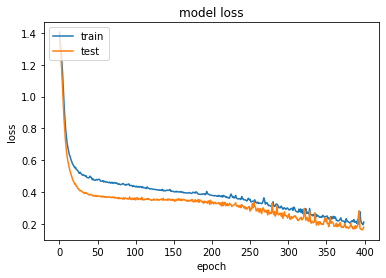

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][0:400])
plt.plot(history.history['val_loss'][0:400])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Convertendo os resultados binários para o nome dos acidentes

In [37]:
saidasPrevistas = model.predict(entradasTeste)

In [38]:
# Convertendo os resultados das saídas previstas para 0 e 1
for i in range(len(saidasPrevistas)):
  for j in range(len(saidasPrevistas[0])):
    saidasPrevistas[i][j] = round(saidasPrevistas[i][j],0)

# Convertendo os números binários para o nome dos acidentes correspondentes
saidasPrevistas = list(saidasPrevistas)
saidasTeste = list(saidasTeste)
for i in range(len(saidasPrevistas)):
    if saidasPrevistas[i][0] == 1 and saidasPrevistas[i][1] == 0 and saidasPrevistas[i][2] == 0 and saidasPrevistas[i][3] == 0:
      saidasPrevistas[i] = 'blacksem'
    elif saidasPrevistas[i][0] == 0 and saidasPrevistas[i][1] == 1 and saidasPrevistas[i][2] == 0 and saidasPrevistas[i][3] == 0:
      saidasPrevistas[i] = 'mefwisem'
    elif saidasPrevistas[i][0] == 0 and saidasPrevistas[i][1] == 0 and saidasPrevistas[i][2] == 1 and saidasPrevistas[i][3] == 0:
      saidasPrevistas[i] = 'mfwbr'
    elif saidasPrevistas[i][0] == 0 and saidasPrevistas[i][1] == 0 and saidasPrevistas[i][2] == 0 and saidasPrevistas[i][3] == 1:
      saidasPrevistas[i] = 'mfwisem'

for i in range(len(saidasTeste)):
    if saidasTeste[i][0] == 1 and saidasTeste[i][1] == 0 and saidasTeste[i][2] == 0 and saidasTeste[i][3] == 0:
      saidasTeste[i] = 'blacksem'
    elif saidasTeste[i][0] == 0 and saidasTeste[i][1] == 1 and saidasTeste[i][2] == 0 and saidasTeste[i][3] == 0:
      saidasTeste[i] = 'mefwisem'
    elif saidasTeste[i][0] == 0 and saidasTeste[i][1] == 0 and saidasTeste[i][2] == 1 and saidasTeste[i][3] == 0:
      saidasTeste[i] = 'mfwbr'
    elif saidasTeste[i][0] == 0 and saidasTeste[i][1] == 0 and saidasTeste[i][2] == 0 and saidasTeste[i][3] == 1:
      saidasTeste[i] = 'mfwisem'

## Criando listas 'acidentes' e 'quantidade de acidentes' para os conjuntos 'previsto' e 'teste'

In [39]:
acidentes = ['blacksem','mefwisem','mfwbr','mfwisem','nenhum']
acidentes_prev = [0,0,0,0,0]
for i in range(len(saidasPrevistas)):
  if saidasPrevistas[i] in acidentes:
    if saidasPrevistas[i] == 'blacksem':
      acidentes_prev[0] += 1
    elif saidasPrevistas[i] == 'mefwisem':
      acidentes_prev[1] += 1
    elif saidasPrevistas[i] == 'mfwbr':
      acidentes_prev[2] += 1
    elif saidasPrevistas[i] == 'mfwisem':
      acidentes_prev[3] += 1
    else:
      acidentes_prev[4] += 1
      
acidentes_teste = [0,0,0,0,0]
for i in range(len(saidasTeste)):
  if saidasTeste[i] in acidentes:
    if saidasTeste[i] == 'blacksem':
      acidentes_teste[0] += 1
    elif saidasTeste[i] == 'mefwisem':
      acidentes_teste[1] += 1
    elif saidasTeste[i] == 'mfwbr':
      acidentes_teste[2] += 1
    elif saidasTeste[i] == 'mfwisem':
      acidentes_teste[3] += 1
    else:
      acidentes_teste[4] += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


## Avaliando resultados

In [40]:
acertos = 0
for i in range(len(saidasTeste)):
  if saidasTeste[i] == saidasPrevistas[i]:
    acertos += 1
porcent = (acertos/len(saidasTeste))*100
print("Porcentagem de acertos: %f %%" %porcent)

Porcentagem de acertos: 89.115646 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0.5, 'Quantidade'),
 Text(0.5, 0, 'Acidentes'),
 Text(0.5, 1.0, 'Acidentes Teste')]

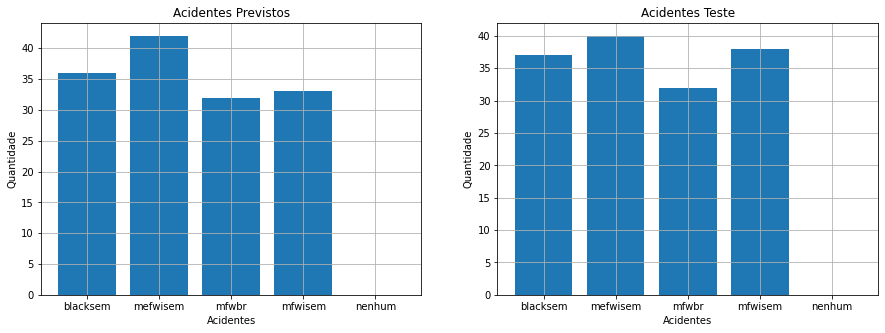

In [41]:
fig, (graf1, graf2) = plt.subplots(1, 2, figsize=(15,5))
graf1.bar(acidentes, acidentes_prev)
graf1.grid('True')
graf2.bar(acidentes, acidentes_teste)
graf2.grid('True')
graf1.set(title='Acidentes Previstos', xlabel='Acidentes', ylabel='Quantidade')
graf2.set(title='Acidentes Teste', xlabel='Acidentes', ylabel='Quantidade')